In [1]:
import graph
import powerlaw
import networkx as nx
import matplotlib.pyplot as plt

# 1 Introduction

The notebook utilize Liz Krueger as a starting point to iteratively construct a network of environmental influence within New York. Subsequently, the network is visualized and analyzed for further insights.

## 1.1 Assumptions
- Five type of nodes: Policy, Politician, Committee, Donor, Interest Group.
    - The policies (bills) are all environment-related in recent years.
- Five type of edges (relations): Vote, Sponsor, Concensus, Donate, Rate.
- The graph is weighted and directed.
    - The weights of Donate edges and Rate edges are normalized to between 0 and 1 using min-max scaling, respectively. 
    - The weight of concensus is set to 1 if the two politicians who support the the same policy belong to the same party; otherwise, it is set to 0.5.
    - The default weight for other edges is 1.

## 1.2 Analysis Objectives
- Structural evolution in the process of graph construction.
    - Refer to [graph_construct_diagrams](graph_construct_diagrams) folder for details.
- Influence study using centrality metrics
    - Degree centrality: measures the number of edges connected to a node. It is defined as the number of edges connected to a node divided by the maximum possible edges that the node could have.
    - Betweenness centrality: measures the number of times a node acts as a bridge along the shortest path between two other nodes. It is defined as the number of shortest paths going through a node divided by the total number of shortest paths.
    - Closeness centrality: measures how easily a node in a network can access all other nodes in the network. It is calculated as the inverse of the average shortest path length from the node to all other nodes in the network. Nodes with high closeness centrality are able to access other nodes more efficiently than nodes with low closeness centrality. 
    - PageRank centrality: computes a ranking of the nodes in the graph based on the structure of the incoming links. It was originally designed as an algorithm to rank web pages.
- Sensitivity analysis
- Community detection

# 2 Graph Construction

## 2.1 First Iteration
- Scrape the environment bills for which Liz Krueegr votes yes since 2021, create the corresponding nodes and edges.
- Scrape her campagin donors, create the corresponding nodes and edges (donation amount >= 2000).
- Scrape the interest groups that endorse her, create the corresponding nodes and edges (rating >= 60).

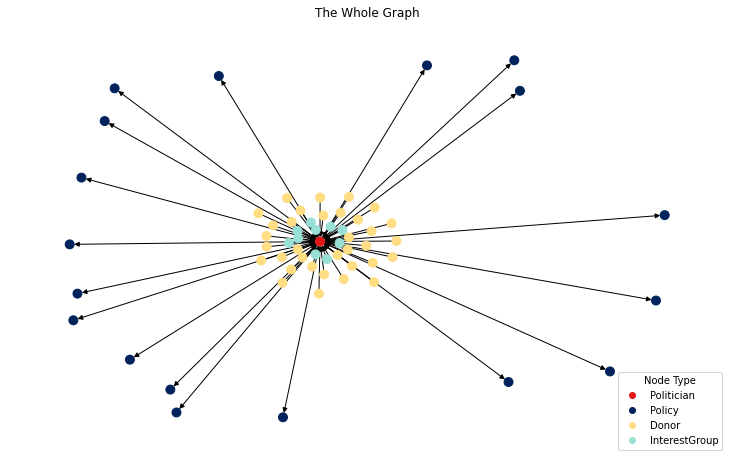

In [2]:
name='Liz Krueger'
state='NY'

directory = 'processed_data/NY/first_iter'
all_nodes, all_edges = graph.read_pkl(directory)
# create empty directed graph
DiG = nx.DiGraph()
# define a color map for different node types
color_map={'Politician':'#E21818', 'Policy':'#00235B', 'Donor':'#FFDD83', 'InterestGroup':'#98DFD6'}
graph.draw_whole_graph(DiG, all_nodes, all_edges, color_map)

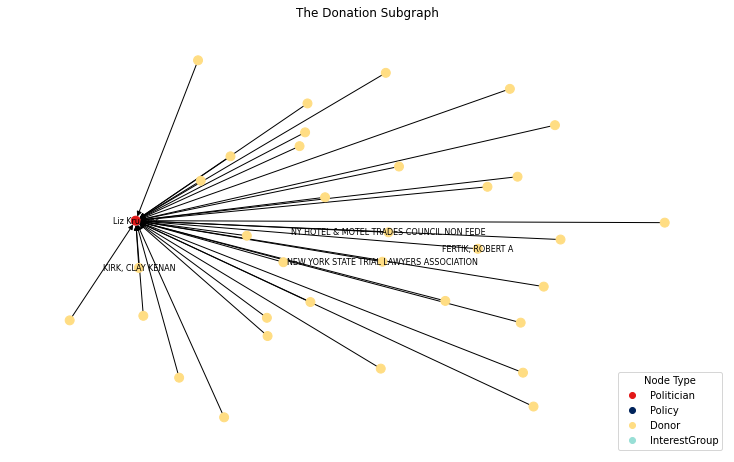

In [3]:
graph.draw_donation_graph(DiG, color_map)

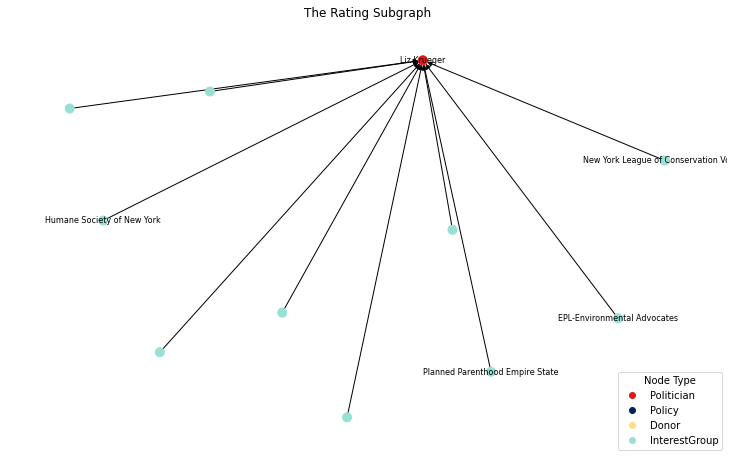

In [4]:
graph.draw_rating_graph(DiG, color_map)

In [5]:
dc1, bc1, cc1, pc1 = graph.centrality(DiG, politician_name=name, state=state, top_n=10)

Centrality Metrics of the Liz Krueger (NY) Network

Degree Centrality
-----------------
Liz Krueger: 1.0
NEW YORK STATE TRIAL LAWYERS ASSOCIATION: 0.016129032258064516
KIRK, CLAY KENAN: 0.016129032258064516
NY HOTEL & MOTEL TRADES COUNCIL NON FEDE: 0.016129032258064516
FERTIK, ROBERT A: 0.016129032258064516
KIRK JR, GARRETT: 0.016129032258064516
NEW YORK STATE PUBLIC EMPLOYEES FEDERATION: 0.016129032258064516
1199 SEIU FLORIDA: 0.016129032258064516
VOTECOPE OF THE NYS UNITED TEACHERS-S: 0.016129032258064516
ALEXANDER, PRISCILLA: 0.016129032258064516

Betweenness Centrality
----------------------
Liz Krueger: 0.2094130089899524
NEW YORK STATE TRIAL LAWYERS ASSOCIATION: 0.0
KIRK, CLAY KENAN: 0.0
NY HOTEL & MOTEL TRADES COUNCIL NON FEDE: 0.0
FERTIK, ROBERT A: 0.0
KIRK JR, GARRETT: 0.0
NEW YORK STATE PUBLIC EMPLOYEES FEDERATION: 0.0
1199 SEIU FLORIDA: 0.0
VOTECOPE OF THE NYS UNITED TEACHERS-S: 0.0
ALEXANDER, PRISCILLA: 0.0

Closeness Centrality
--------------------
Liz Krueger: 0.709677419

## 2.2 Second Iteration
- Scrape the second depth politicians/committees who are the sponsors of the environment bills for which Liz Krueger votes yes since 2021.
- Create the edges between the second depth politicians/committees and the bills they sponsor.
- Create the edges between the second depth politicians who sponsor the same bill.

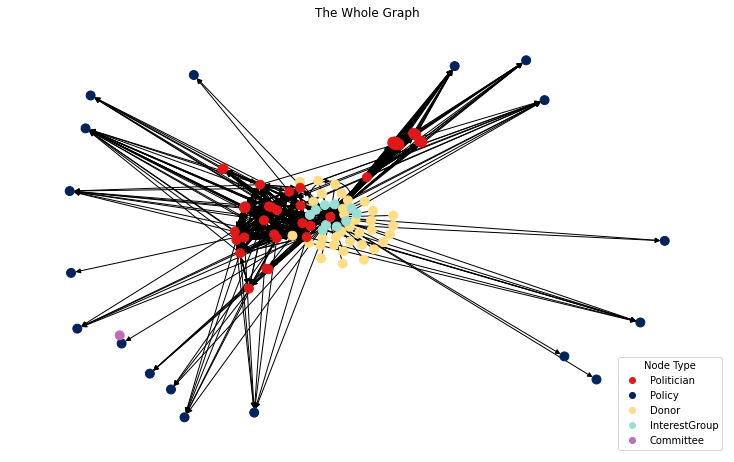

In [6]:
directory = 'processed_data/NY/second_iter'
new_nodes, new_edges = graph.read_pkl(directory)
# update the color map to include new node_type
color_map['Committee'] = '#BE6DB7'
graph.draw_whole_graph(DiG, new_nodes, new_edges, color_map)

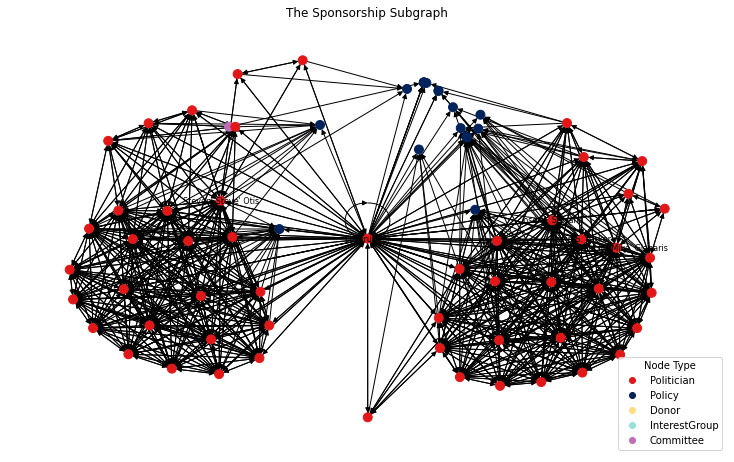

In [7]:
graph.draw_sponsorship_graph(DiG, color_map)

In [8]:
dc2, bc2, cc2, pc2 = graph.centrality(DiG, politician_name=name, state=state, top_n=10)

Centrality Metrics of the Liz Krueger (NY) Network

Degree Centrality
-----------------
Liz Krueger: 1.4608695652173913
José M. Serrano: 0.5043478260869565
Steven 'Steve' Otis: 0.4782608695652174
Michael N. 'Mike' Gianaris: 0.46956521739130436
Kevin S. Parker: 0.46956521739130436
Robert Jackson: 0.45217391304347826
Gustavo Rivera: 0.45217391304347826
Joseph P. Addabbo Jr.: 0.45217391304347826
Peter B. 'Pete' Harckham: 0.4434782608695652
Chris Burdick: 0.43478260869565216

Betweenness Centrality
----------------------
Liz Krueger: 0.39587652156302044
Steven 'Steve' Otis: 0.0056922196796338675
José M. Serrano: 0.004744434097981008
Michael N. 'Mike' Gianaris: 0.0024708758061160806
Kevin S. Parker: 0.0023861833987692113
Joseph P. Addabbo Jr.: 0.002109676915168906
Gustavo Rivera: 0.001884809190301181
Robert Jackson: 0.001850968550053218
Peter B. 'Pete' Harckham: 0.0013979035203291496
Chris Burdick: 0.0011536994660564456

Closeness Centrality
--------------------
Liz Krueger: 0.8347826086956

## 2.3 Third Iteration
- Scrape the campagin donors for each second depth politician, create the corresponding nodes and edges (donation amount >= 2000).

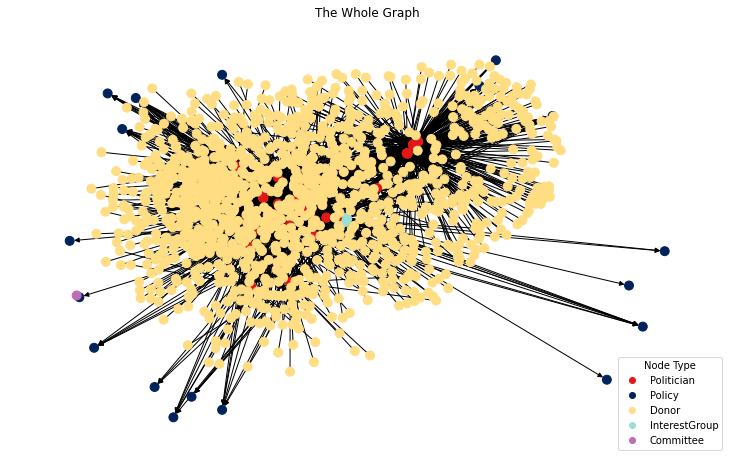

In [9]:
directory = 'processed_data/NY/third_iter'
new_nodes, new_edges = graph.read_pkl(directory)
graph.draw_whole_graph(DiG, new_nodes, new_edges, color_map)

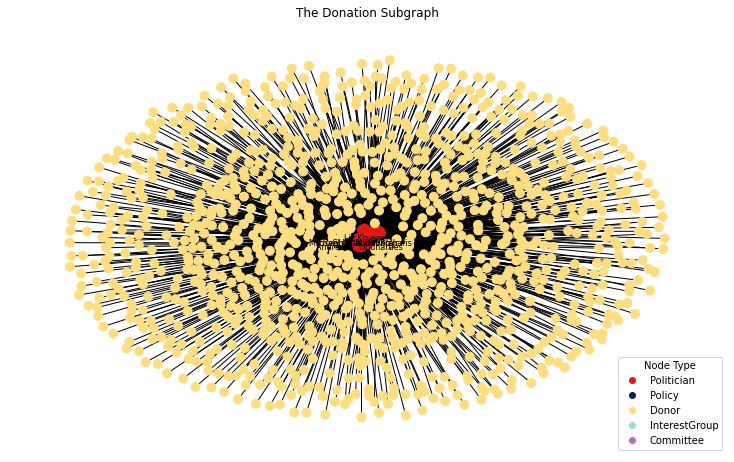

In [10]:
graph.draw_donation_graph(DiG, color_map)

In [11]:
dc3, bc3, cc3, pc3 = graph.centrality(DiG, politician_name=name, state=state, top_n=10)

Centrality Metrics of the Liz Krueger (NY) Network

Degree Centrality
-----------------
Liz Krueger: 0.1347233360064154
Michael N. 'Mike' Gianaris: 0.1226944667201283
Gustavo Rivera: 0.1218925421010425
Joseph P. Addabbo Jr.: 0.1210906174819567
Kevin S. Parker: 0.11467522052927025
Andrew S. Gounardes: 0.11307137129109864
Timothy M. 'Tim' Kennedy: 0.11307137129109864
Andrea Stewart-Cousins: 0.11307137129109864
Kevin Thomas: 0.10425020048115477
Jeremy Cooney: 0.10184442662389735

Betweenness Centrality
----------------------
Liz Krueger: 0.02965801314906775
Gustavo Rivera: 0.003581401234310026
Joseph P. Addabbo Jr.: 0.0035135264040283207
Kevin S. Parker: 0.003316472757889078
Timothy M. 'Tim' Kennedy: 0.0031789869624522593
Andrew S. Gounardes: 0.002920909089371622
Jeremy Cooney: 0.0028069396055710035
Andrea Stewart-Cousins: 0.00273626133095859
Michael N. 'Mike' Gianaris: 0.0026989266690446607
John W. Mannion: 0.0023843281922538446

Closeness Centrality
--------------------
Liz Krueger: 0.5

## 2.4 Fourth Iteration
- Scrape the interest groups that endorse each second depth politician, create the corresponding nodes and edges (rating >= 60).

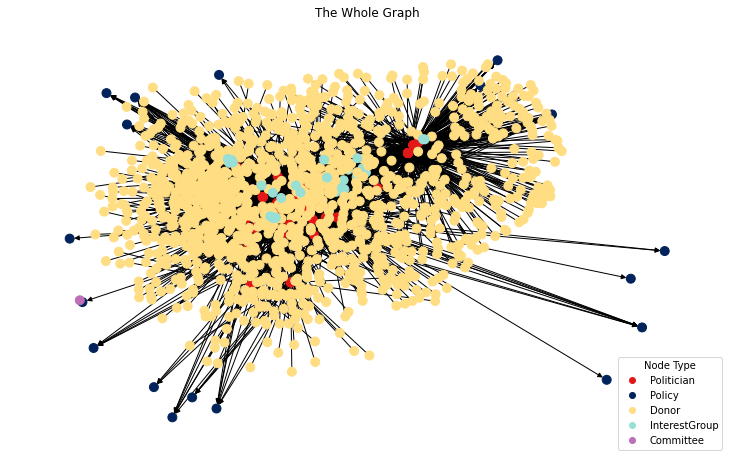

In [12]:
directory = 'processed_data/NY/fourth_iter'
new_nodes, new_edges = graph.read_pkl(directory)
graph.draw_whole_graph(DiG, new_nodes, new_edges, color_map)

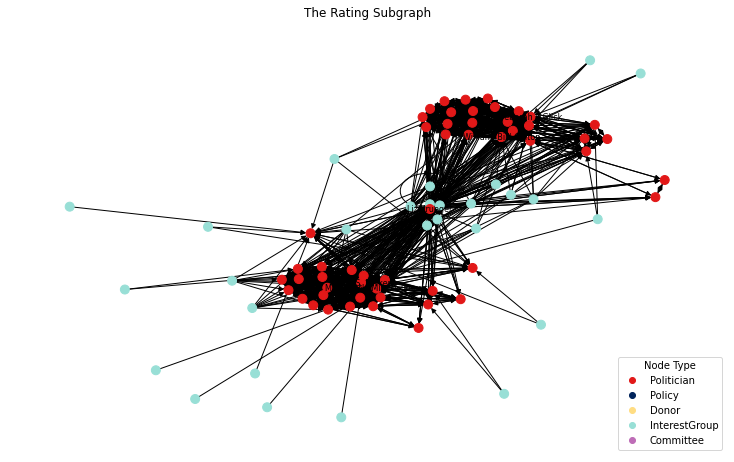

In [13]:
graph.draw_rating_graph(DiG, color_map)

In [14]:
dc4, bc4, cc4, pc4 = graph.centrality(DiG, politician_name=name, state=state, top_n=10)

Centrality Metrics of the Liz Krueger (NY) Network

Degree Centrality
-----------------
Liz Krueger: 0.13280632411067195
Michael N. 'Mike' Gianaris: 0.13122529644268774
Joseph P. Addabbo Jr.: 0.12569169960474308
Gustavo Rivera: 0.1241106719367589
Kevin S. Parker: 0.1225296442687747
Andrea Stewart-Cousins: 0.11857707509881422
Timothy M. 'Tim' Kennedy: 0.11778656126482213
Andrew S. Gounardes: 0.11383399209486166
Kevin Thomas: 0.10513833992094862
Jeremy Cooney: 0.10355731225296443

Betweenness Centrality
----------------------
Liz Krueger: 0.028875596739991984
Gustavo Rivera: 0.003489510433479858
Joseph P. Addabbo Jr.: 0.003475801935202637
Kevin S. Parker: 0.0032964507003107883
Timothy M. 'Tim' Kennedy: 0.0031011488196518895
Andrew S. Gounardes: 0.00283859049032207
Jeremy Cooney: 0.00274967577769555
Andrea Stewart-Cousins: 0.0026922279227078075
Michael N. 'Mike' Gianaris: 0.0026876458906388238
John W. Mannion: 0.0023407421830627215

Closeness Centrality
--------------------
Liz Krueger: 0

# 3 Power Law
- Power law is a type of distribution that is commonly observed in real-world networks, including social networks. Since the construction of our network is based on subjective choices, it can be challenging to ensure that the network accurately reflects the characteristics of a real social network. By analyzing the degree distribution of the network and fitting it to a power law, we can assess how representative the constructed network is of a real social network.
- The figure shows that our network follows the power law, meaning that most nodes have a relatively small degree (fewer edges), while only a few nodes have a large degree. 
- Notably, the tail of the degree distribution contains mostly politicians with high degrees, appearing more frequently than expected under a power law distribution. This suggests that our assumption when constructing the network, which links politicians who support the same bill and assumes they must be related, may have overestimated the actual situation.

Calculating best minimal value for power law fit


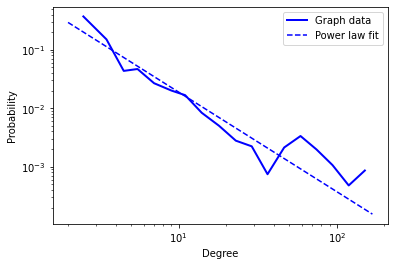

In [15]:
graph.plot_power_law(DiG)

# 4 Sensitivity Analysis
- Use the first iteration as the benchmark; use the Jaccard Similarity Index to measure the similarity of different iterative processes and the benchmark.
- Due to local computing power limitations, it is not feasible to calculate sensitivity analysis with each new node added. Instead, nodes of the same type are added for each iteration, allowing for sensitivity analysis to be performed on an iterative basis. 
- It is worth noting that some metrics become stable from the second iteration, while others become stable from the third. This suggests that structural changes in the graph have varying effects on different metrics.

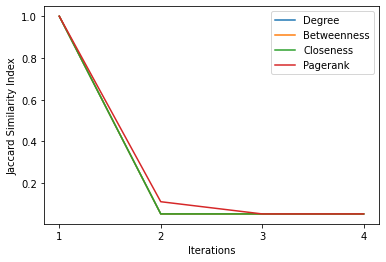

In [16]:
y1 = graph.calculate_y(dc1, dc2, dc3, dc4)
y2 = graph.calculate_y(bc1, bc2, bc3, bc4)
y3 = graph.calculate_y(cc1, cc2, cc3, cc4)
y4 = graph.calculate_y(pc1, pc2, pc3, pc4)

y_lst = [y1, y2, y3, y4]
x = [1, 2, 3, 4]

graph.plot_sensitivity(x, y_lst)

# 5 Centality Metrics Comparison
- Use the fourth iteration network as the basis for the comparison
- Compare the ranking of the top-10 nodes obtained from the different centrality metrics through Jaccard Similarity Index heatmaps.
- The heatmaps will display a value for each pair of centrality metrics, with a higher index indicating a more similar ranking of nodes.

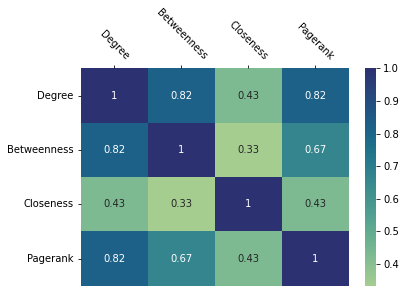

In [17]:
metrics = {'Degree':set(dc4), 'Betweenness':set(bc4), 'Closeness':set(cc4), 'Pagerank':set(pc4)}
jaccard_mat = graph.jaccard_sim(list(metrics.values()))
graph.plot_heatmap(jaccard_mat, list(metrics.keys()))

# 6 Community Detection 
- Analyze on the fourth iteration network.
- Apply Louvain Community Detection Algorithm to identify communities of nodes that share similar characteristics. 
- While most nodes of the same type were in the same community, some exceptions were found. For example, if a community had a mix of individual politicians and interest groups, it might indicate underlying connections or relationships.

In [18]:
graph.community_detection(DiG)

Community 0: ['NEW YORK STATE TRIAL LAWYERS ASSOCIATION', 'NEW YORK STATE PUBLIC EMPLOYEES FEDERATION', '1199 SEIU FLORIDA', 'AMERICAN FEDERATION OF STATE COUNTY & MUNICIPAL EMPLOYEES / AFSCME', 'COMMUNICATIONS WORKERS NEW JERSEY DISTRICT 1', 'BUFFALO AFL-CIO COUNCIL', 'HOTEL RESTAURANT CLUB EMPLOYEES & BARTENDERS LOCAL 6', 'KRUEGER, ELIZABTH (LIZ)', 'MASON TENDERS DISTRICT COUNCIL OF GREATER NEW YORK', 'TRANSPORT WORKERS LOCAL 100', 'NORML (National Organization for the Reform of Marijuana Laws)', 'The Partnership for the Homeless', 'S 1759A', 'S 4095B', 'S 4378', 'S 528', 'S 5612', 'S 2000', 'S 6599', 'Samra G. Brouk', 'Jeremy Cooney', "Michael N. 'Mike' Gianaris", "Peter B. 'Pete' Harckham", 'Robert Jackson', 'John W. Mannion', 'Zellnor Myrie', 'Kevin S. Parker', 'Gustavo Rivera', 'José M. Serrano', 'James Sanders Jr.', 'Jabari Brisport', 'Jessica Ramos', 'Julia Salazar', 'Joseph P. Addabbo Jr.', 'Kevin Thomas', 'Shelley B. Mayer', 'Luis R. Sepúlveda', 'Leroy G. Comrie', 'Jamaal T. 

In [19]:
# graph.save_node_neighbors(DiG, node_type='Donor', path='processed_data/NY_Donor_breakdown.csv')
# graph.save_node_neighbors(DiG, node_type='InterestGroup', path='processed_data/NY_InterestGroup_breakdown.csv')